<div style="border: solid gray 2px; padding: 20px">
    
# Исследование данных аренды самокатов GoFast.

Суть проекта: нам предстоит проанализировать данные аренды самокатов GoFast пользователями из нескольких городов, а также данные об их поездках. Проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

---
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки

    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

---
   
**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

Таблица users_go:
- `user_id` - уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` - возраст
- `city` - город
- `subscription_type` - тип подписки (free, ultra)

Таблица rides_go:
- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользовтаель проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) - время с того момента, как пользователь нажал кнопку "Начать поездку" до момента, как он нажал кнопку "Завершить поездку"
- `date` - дата совершения поездки

Таблица subscriptions_go:
- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа
---
    
**Цель исследования**

1. Изучить данные по вакансиям портала HH.ru и выявить интересные закономерности.
2. Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.
3. Написать выводы по результатам исследования.
---
    
***Ход исследования***
    
Данные о вакансиях получим из двух файлов: vacancies_da.xlsx и vacancies_sa.xlsx О качестве датасета информации нет. Перед тем как приступать к цели исследования, нам необходимо изучить данные.
    
Проверим данные на предмет ошибок и оценим их влияние на результаты исследования. В процессе преодобработки данных попробуем исправить все ошибки, которые могут привести к искажению конечного результата. Далее мы проиллюстрируем все гипотезы и выводы на подходящих графиках и приступим к исследовательскому анализу данных и выявлению закономерностей.
    
Таким образом, мое исследование пройдет в следующие этапы:
    
- Загрузка и предобработка данных.
- Исследовательский анализ данных.
- Объединение датафреймов в общий с данными и разделение его на два: пользователей с подпиской и пользователей без подписки.
- Подсчет выручки, суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.
- Проверка гипотез.
- Подбор параметров распределений для двух задач и визуализация их на графиках.
- Формулирование выводов и рекомендаций.

## Загрузка данных и изучение общей информации

***1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.***

Импортируем необходимые нам библиотеки для изучения общей информации и предобработки данных.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Сохраним файлы с данными в датафреймы.

In [18]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('C:/Users/etols/Downloads/users_go.csv')

In [19]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('C:/Users/etols/Downloads/rides_go.csv')

In [20]:
try:
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subs = pd.read_csv('C:/Users/etols/Downloads/subscriptions_go.csv')

***1.2 Выведем первые несколько строк и общую информацию о каждом датафрейме.***

In [21]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [23]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [24]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [25]:
subs

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [26]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Изучив общую информацию о датафреймах, мы видим, что практически все типы данных корректны, за исключением столбца `date`, который имеет тип object. Далее приведем тип данных к корректному типу данных, date.

## Предобработка данных

***2.1. Преобразуем тип данных в столбце date.***

In [27]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

***2.2 Создадим новый столбец с номером месяца на основе столбца `date`.***

На всякий случай, посмотрим, за какой период у нас представлены данные, потому что если у нас в выборке несколько разных лет, то один и тот же месяц может принадлежать к разным годам, в таком случае, данные могут быть непоказательны.

In [28]:
rides['date'].dt.year.unique()

array([2021], dtype=int32)

Данные представлены только за один год, 2021, поэтому можем спокойно выводить столбец с месяцем.

In [29]:
rides['month_date'] = rides['date'].dt.month
rides['month_date'].head()

0    1
1    1
2    4
3    8
4    8
Name: month_date, dtype: int32

***2.3 Теперь проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.***

In [30]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [31]:
rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
month_date    0
dtype: int64

In [32]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Мы проверили все наши датафреймы на наличие пропущенных значений, пропусков в данных нет. Проверим на наличие дубликатов.

In [33]:
users.duplicated().sum()

np.int64(31)

In [34]:
users = users.drop_duplicates()

In [35]:
users.duplicated().sum()

np.int64(0)

In [36]:
rides.duplicated().sum()

np.int64(0)

In [37]:
subs.duplicated().sum()

np.int64(0)

**Выводы**

- мы преобразовали тип данных в столбце `date` к корректному типу данных
- далее мы создали новый столбец с месяцем на основе столбца `date` датафрейма с поездками
- пропусков в данных нет
- в одном из датафреймов, а именно users, мы нашли 31 явный дубликат, дубликаты мы удалили.

In [38]:
# Комментарий ревьюера 0
temp = rides.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

In [39]:
rides['distance'] = rides['distance'].round(2)

In [40]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [41]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Посмотрели, есть ли аномальные значения в столбце с длительностью поездок и сразу с расстоянием поездок, минимальная длительность составляет 0,5 минуты, можно предположить, что происходит какая-то техническая неисправность, что дальнейшее использование самоката невозможно. Кстати, минимальное расстояние - 0,86 м, по логике как раз в этих случаях такое и может быть.

Посмотрим, на другие записи при продолжительности поездок по полминуты.

In [42]:
rides.query("duration == 0.5")

,user_id,distance,duration,date,month_date
6531,701,4196.45,0.5,2021-08-31,8
6570,704,4830.82,0.5,2021-10-14,10
6680,712,4684.00,0.5,2021-03-04,3
6695,713,5215.64,0.5,2021-02-25,2
6768,718,5197.44,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.34,0.5,2021-01-19,1
17242,1477,6724.93,0.5,2021-01-12,1
17314,1483,4445.48,0.5,2021-03-06,3
17505,1496,5722.55,0.5,2021-02-14,2


Что очень интересно, минимальные значения продолжительности поездок не соответствуют минимальному расстоянию, наоборот приближаются к максимальным значениям, по 4-6 км. Причем совершенно разные даты, и месяцы, разные пользователи. 

На эти данные я бы обратила внимание владельцев приложения, получается скорее всего возникла техническая неисправность со счетчиком длительности поездки, а оплата в приложении поминутная. 

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

***3.1. Частота встречаемости городов.***

In [43]:
users['city'].value_counts().reset_index()

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


In [44]:
city_percent = round(users['city'].value_counts() / users['city'].value_counts().sum() * 100, 1)
city_percent

city
Пятигорск         14.3
Екатеринбург      13.3
Ростов-на-Дону    12.9
Краснодар         12.6
Сочи              12.3
Омск              11.9
Тюмень            11.7
Москва            11.0
Name: count, dtype: float64

In [45]:
plt.style.use('classic')

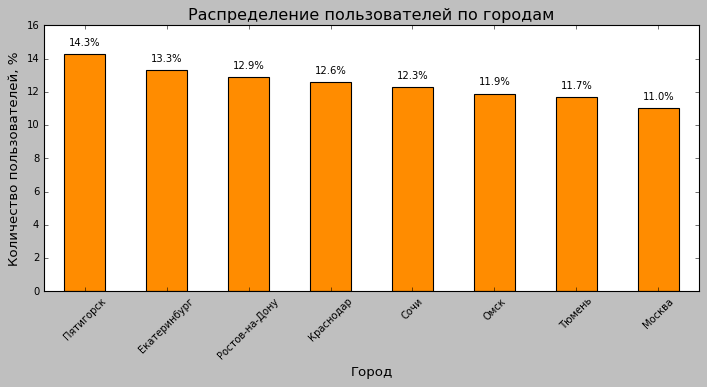

In [46]:
ax = round(users['city'].value_counts() / users['city'].value_counts().sum() * 100, 1).plot(
    kind='bar',
    title='Распределение пользователей по городам',
    fontsize=9,
    xlabel='Город',
    ylabel='Количество пользователей, %',
    figsize=(9, 5),
    color='DarkOrange'
)

for i, value in enumerate(city_percent):
    ax.text(i, value + 0.5, f'{value}%', ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

В нашей выборке пользователи распределены по городам достаточно равномерно, больше всего (а именно 14,3 %) - пользователи из города Пятигорска, удивительно, но меньше всего (а именно 11 %) - это пользователи из города Москвы. Возможно это связано с тем, что в связи с размером города Москвы здесь самокаты не сильно популярны.

Кстати, примерно в 2021 году в таком городе, как Санкт-Петербург, например, как раз самокаты начинали приобретать большую популярность (в том году я была там в отпуске и была удивлена настолько большим количеством расставленных на улицах самокатов), однако в нашей выборке Питер не представлен и проверить мою гипотезу мы не сможем.

***3.2. Соотношение пользователей с подпиской и без подписки.***

In [47]:
users['subscription_type'].value_counts().reset_index()

,subscription_type,count
0,free,835
1,ultra,699


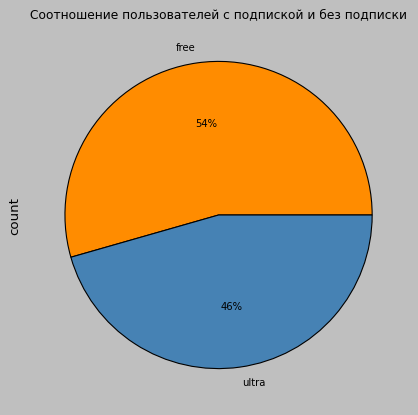

In [48]:
users['subscription_type'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    colors = ['DarkOrange', 'SteelBlue'],
    fontsize=9)
plt.title('Соотношение пользователей с подпиской и без подписки', fontsize=11)
plt.show()

Здесь обошлось без сюрпризов. Пользователей с бесплатной подпиской больше, чем пользователей с платной подпиской (54 % против 46 %).

***3.3. Возраст пользователей.***

Посмотрим сначала, нет ли аномальных значений возраста пользователей приложения. Заодно посмотрим на самых младших и самых старших пользователей приложения.

In [49]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Возраст пользователей колеблется от 12 лет до 43 лет, средний возраст пользователей приложения - 25 лет.

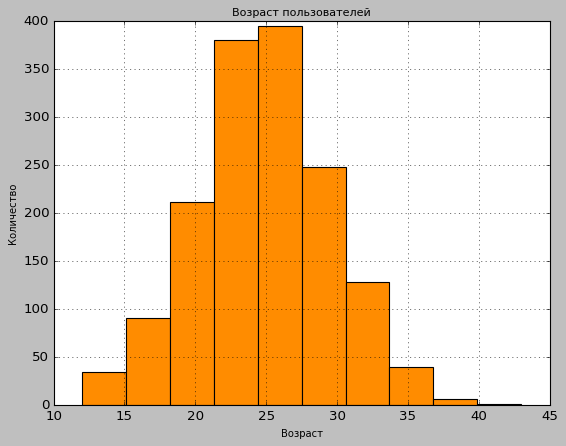

In [50]:
users['age'].hist(bins=10, color='DarkOrange')

plt.title('Возраст пользователей', fontsize=10)
plt.xlabel('Возраст', fontsize=9)
plt.ylabel('Количество', fontsize=9)
plt.show()

Большинство пользователей приложения находятся в возрасте от 20 до 30 лет. Минимальный возраст в датасете - 12 лет, однако по закону прокатом самокатов можно пользоваться только с 18 лет.

***3.4. Расстояние, которое пользователь преодолел за одну поездку.***

Посмотрим описательную статистику расстояний, преодоленных пользователями за одну поездку, которые представлены в нашей выборке.

In [51]:
rides.head()

,user_id,distance,duration,date,month_date
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


In [52]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Минимальное расстояние, которое преодолел пользователь на самокате - 0,86 м, максимальное расстояние - 7,21 км.

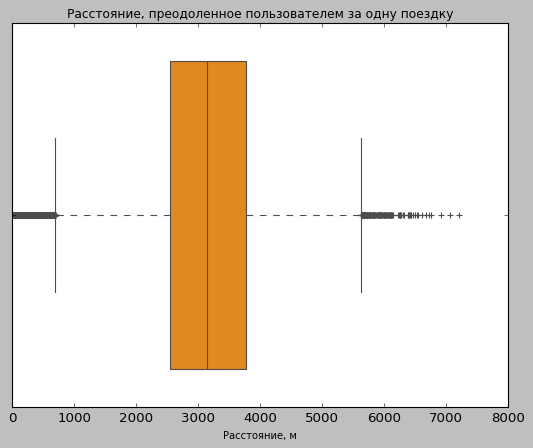

In [53]:
sns.boxplot(x = rides['distance'], color='DarkOrange')

plt.title('Расстояние, преодоленное пользователем за одну поездку', fontsize=11)
plt.xlabel('Расстояние, м', fontsize=9)

plt.show()

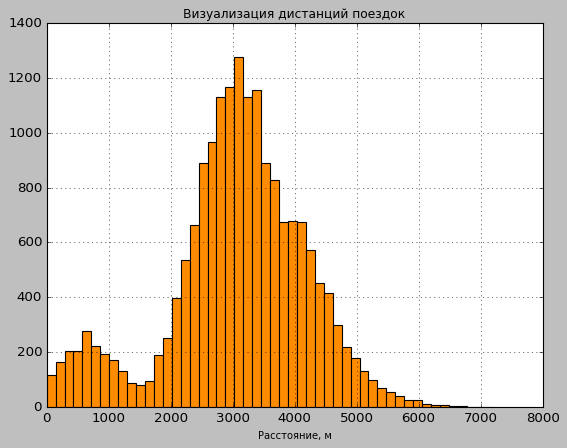

In [54]:
rides['distance'].hist(
    bins = 50,
    color='DarkOrange'
)

plt.title('Визуализация дистанций поездок', fontsize=11)
plt.xlabel('Расстояние, м', fontsize=9)
plt.show()

В среднем пользователи приложения преодолевали расстояние около 3 км за одну поездку. Чаще всего пользователи преодолевали расстояние примерно от 2,5 км до 4 км.

***3.5. Продолжительность поездок.***

In [55]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Минимальная продолжительность поездки - 0,5 минут (причем в этих поездках минимальное время не значит минимальное расстояние, как мы выяснили ранее), вероятно возникла какая-то техническая неисправность, и сломался счетчик времени (что обязательно отразится на выручке, поскольку тарификация идет поминутная), максимальная продолжительность поездки - 41 минута.

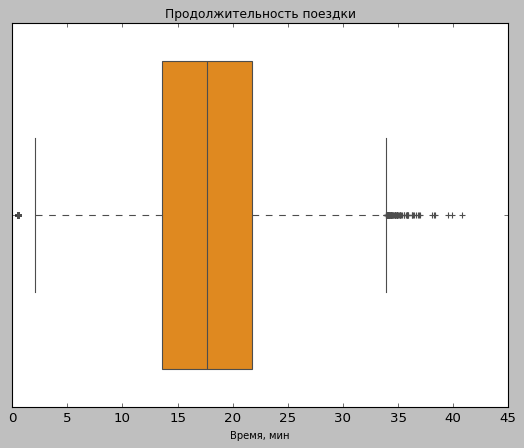

In [56]:
sns.boxplot(x = rides['duration'], color='DarkOrange')

plt.title('Продолжительность поездки', fontsize=11)
plt.xlabel('Время, мин', fontsize=9)

plt.show()

В среднем пользователи проводили в поездках на самокатах около 17 минут, чаще всего поездки длились от 13 до 22 минуты.

**Выводы**

**Частота встречаемости городов**

В нашей выборке пользователи распределены по городам достаточно равномерно, больше всего (а именно 14,3 % или 219 человек) - пользователи из города Пятигорска, удивительно, но меньше всего (а именно 11 % или 168 человек) - это пользователи из города Москвы. Возможно это связано с тем, что в связи с тем, что Москва очень крупный город, и не всегда возможно здесь добраться до нужного места с помощью самоката.

**Соотношение пользователей с подпиской и без подписки**

В данном случае также не сильно большая разница между двумя группами пользователей - 54 % пользователей бесплатной подписки против 46 % пользователей с платной подпиской.

**Возраст пользователей**

Самому младшему пользователю приложения 12 лет (что является явным нарушением существующих норм, прокат самокатов разрешен с 18 лет), самому старшему - 43 года. Более всего пользователей приложения представлено в диапазоне от 20 до 30 лет.

**Расстояние, преодоленное пользователем за одну поездку**

Минимальное расстояние, которое преодолел пользователь на самокате за одну поездку - 0,86 м, максимальное расстояние на одну поездку - 7,21 км. В среднем, за одну поездку пользователи проезжали около 3 км.

**Продолжительность поездок**

Минимальная продолжительность поездок составляет 0,5 минут (причем в этих поездках минимальное время не значит минимальное расстояние), вероятно возникла какая-то техническая неисправность и сломался счетчик времени (что обязательно отразится на выручке, поскольку тарификация идет поминутная), максимальная продолжительность поездки - 41 минута. В среднем пользователи проводили в поездке на самокате около 17 минут.

## Объединение данных

***4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Используем для этой цели метод merge().***

In [57]:
df = users.merge(rides, how='right', on='user_id')
df = df.merge(subs, how='left', on='subscription_type')

Проверим на всякий случай, что при объединении потери данных не произошло.

In [58]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.674362,2021-11-27,11,8,50,0


Проверим итоговый датасет на пропуски и посмотрим, не потерялись ли данные.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [60]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_date           0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Размерность в порядке, никаких данных в процессе объединения не потерялось. Проусков в данных также нет.

***4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1.***

Нам нужны данные о пользователях без подписки и данные о пользователях с подпиской.

In [61]:
df_free = df.query("subscription_type == 'free'")
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.674362,2021-11-27,11,8,50,0


In [62]:
df_ultra = df.query("subscription_type == 'ultra'")
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.839579,2021-10-17,10,6,0,199


***4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.***

Покажем на гистограммах информацию о количестве и расстоянии поездок для пользователей обеих групп.

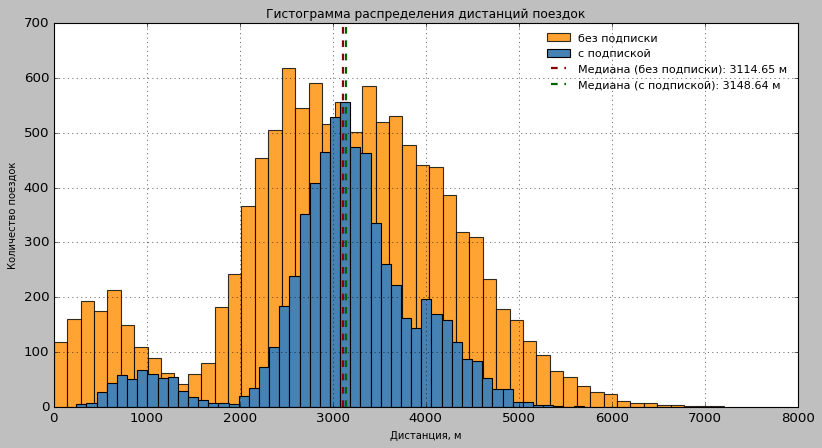

In [63]:
plt.figure(figsize=(12, 6))

ax = df_free['distance'].hist(bins=50, color='DarkOrange', grid=True, label='без подписки', alpha=0.8)
ax = df_ultra['distance'].hist(bins=50, color='SteelBlue', grid=True, label='с подпиской')

median_free = df_free['distance'].median()
median_ultra = df_ultra['distance'].median()

plt.title('Гистограмма распределения дистанций поездок', fontsize=11)
plt.xlabel('Дистанция, м', fontsize=9)
plt.ylabel('Количество поездок', fontsize=9)

plt.axvline(median_free, color='DarkRed', linestyle='--', linewidth=2, label=f'Медиана (без подписки): {median_free:.2f} м')
plt.axvline(median_ultra, color='DarkGreen', linestyle='--', linewidth=2, label=f'Медиана (с подпиской): {median_ultra:.2f} м')

plt.legend(loc='upper right', frameon=False, fontsize=10)
plt.show()

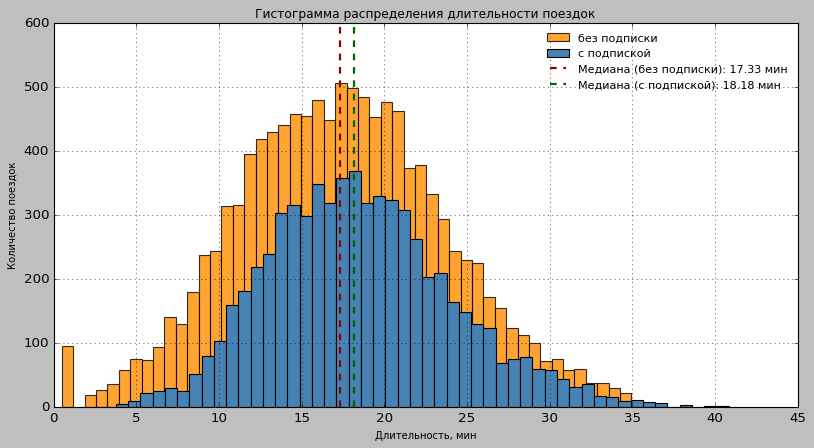

In [64]:
plt.figure(figsize=(12, 6))

ax = df_free['duration'].hist(bins=50, color='DarkOrange', grid=True, label='без подписки', alpha=0.8)
ax = df_ultra['duration'].hist(bins=50, color='SteelBlue', grid=True, label='с подпиской')

median_free = df_free['duration'].median()
median_ultra = df_ultra['duration'].median()

plt.title('Гистограмма распределения длительности поездок', fontsize=11)
plt.xlabel('Длительность, мин', fontsize=9)
plt.ylabel('Количество поездок', fontsize=9)

plt.axvline(median_free, color='DarkRed', linestyle='--', linewidth=2, label=f'Медиана (без подписки): {median_free:.2f} мин')
plt.axvline(median_ultra, color='DarkGreen', linestyle='--', linewidth=2, label=f'Медиана (с подпиской): {median_ultra:.2f} мин')

plt.legend(loc='upper right', frameon=False, fontsize=10)
plt.show()

**Выводы**

Мы объединили наши датафреймы с пользователями, поездками и подписками в один датафрейм со всеми данными, проверили, что данные не потерялись и нет пропусков, далее мы выделили два отдельных датафрейма с двумя группами - пользователи без подписок и пользователи с платными подписками.

Затем мы построили гистограммы с расстояниями, преодоленными пользователями без подписок и пользователями с подписками, а также с продолжительностью поездок также для двух групп и выявили следующие закономерности:

- чаще всего пользователи без подписки преодолевали расстояние от 2,5 км до 4 км, с платной же подпиской - пользователи преодолевали расстояние около 3 км, т.е. бесплатные пользователи проезжали немного более длительное расстояние, чем пользователи с подписками
- среди пользователей без подписок совершено больше всего поездок длительностью от 10 до 25 минут, с платными подписками - от 13 до 22 минут, т.е. и здесь бесплатные пользователи совершают чуть более длительные поездки, чем пользователи с подписками

## Подсчёт выручки

***5.1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.***

In [65]:
df['duration'] = np.ceil(df['duration']) 
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [66]:
data_users_month = df.pivot_table(index=['month_date', 'user_id'],
               values=(
                   'distance',
                   'duration',
                   'minute_price',
                   'start_ride_price',
                   'subscription_fee'
               ),
               aggfunc=('count', 'sum'))

In [67]:
data_users_month.columns = [
    'rides_count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]

In [68]:
data_users_month = data_users_month.drop(['count2', 'count3', 'count4', 'count5'], axis=1)

In [69]:
data_users_month.head()

rides_count  distance  duration  minute_price  \
month_date user_id                                                  
1          1                  2   7027.51      42.0            12   
           3                  1   3061.78      13.0             6   
           5                  1   3914.65      13.0             6   
           7                  2   6478.08      28.0            12   
           12                 1   3577.15      33.0             6   

                    start_ride_price  subscription_fee  
month_date user_id                                      
1          1                       0               398  
           3                       0               199  
           5                       0               199  
           7                       0               398  
           12                      0               199

In [70]:
data_users_month['minute_price'] = data_users_month['minute_price'] / data_users_month['rides_count']
data_users_month['start_ride_price'] = data_users_month['start_ride_price'] / data_users_month['rides_count']
data_users_month['subscription_fee'] = data_users_month['subscription_fee'] / data_users_month['rides_count']
data_users_month.head(5)

rides_count  distance  duration  minute_price  \
month_date user_id                                                  
1          1                  2   7027.51      42.0           6.0   
           3                  1   3061.78      13.0           6.0   
           5                  1   3914.65      13.0           6.0   
           7                  2   6478.08      28.0           6.0   
           12                 1   3577.15      33.0           6.0   

                    start_ride_price  subscription_fee  
month_date user_id                                      
1          1                     0.0             199.0  
           3                     0.0             199.0  
           5                     0.0             199.0  
           7                     0.0             199.0  
           12                    0.0             199.0

Проверим на одном конкретном пользователе, как у нас прошли подсчеты.

In [71]:
data_users_month.query("user_id == 3")

,,rides_count,distance,duration,minute_price,start_ride_price,subscription_fee
month_date,user_id,,,,,,
1,3,1,3061.78,13.0,6.0,0.0,199.0
2,3,2,5421.16,39.0,6.0,0.0,199.0
4,3,1,2956.65,21.0,6.0,0.0,199.0
5,3,3,9064.03,63.0,6.0,0.0,199.0
7,3,3,10919.59,67.0,6.0,0.0,199.0
9,3,1,2891.01,23.0,6.0,0.0,199.0
12,3,1,2593.38,13.0,6.0,0.0,199.0


***5.2. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.***

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. Напишем функцию для подсчета выручки от каждого пользователя по каждому месяцу и применим ее для создания нового столбца.

In [72]:
data_users_month['month_revenue'] = ((data_users_month['start_ride_price'] * data_users_month['rides_count']) 
    + (data_users_month['minute_price'] * data_users_month['duration']) + data_users_month['subscription_fee'])

In [73]:
data_users_month.head()

rides_count  distance  duration  minute_price  \
month_date user_id                                                  
1          1                  2   7027.51      42.0           6.0   
           3                  1   3061.78      13.0           6.0   
           5                  1   3914.65      13.0           6.0   
           7                  2   6478.08      28.0           6.0   
           12                 1   3577.15      33.0           6.0   

                    start_ride_price  subscription_fee  month_revenue  
month_date user_id                                                     
1          1                     0.0             199.0          451.0  
           3                     0.0             199.0          277.0  
           5                     0.0             199.0          277.0  
           7                     0.0             199.0          367.0  
           12                    0.0             199.0          397.0

Снова проверим проведенные подсчеты на одном из пользователей.

In [74]:
data_users_month.query("user_id == 3")

,,rides_count,distance,duration,minute_price,start_ride_price,subscription_fee,month_revenue
month_date,user_id,,,,,,,
1,3,1,3061.78,13.0,6.0,0.0,199.0,277.0
2,3,2,5421.16,39.0,6.0,0.0,199.0,433.0
4,3,1,2956.65,21.0,6.0,0.0,199.0,325.0
5,3,3,9064.03,63.0,6.0,0.0,199.0,577.0
7,3,3,10919.59,67.0,6.0,0.0,199.0,601.0
9,3,1,2891.01,23.0,6.0,0.0,199.0,337.0
12,3,1,2593.38,13.0,6.0,0.0,199.0,277.0


Можно добавить в выводы для наглядности общую годовую выручку и годовую выручку, которую принесли пользователи без подписки и с платной подпиской.

In [75]:
print('Общая годовая выручка:', data_users_month['month_revenue'].sum())

Общая годовая выручка: 3878641.0


In [76]:
print('Годовая выручка от пользователей без подписки:', \
      data_users_month.query("subscription_fee == 0").month_revenue.sum())

Годовая выручка от пользователей без подписки: 2234104.0


In [77]:
print('Годовая выручка от пользователей с платной подпиской:', \
      data_users_month.query("subscription_fee == 199").month_revenue.sum())

Годовая выручка от пользователей с платной подпиской: 1644537.0


***Выводы***

Мы создали отдельный датафрейм с агрегированными данными о поездках на основе общего нашего датафрейма: добавили суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, также добавили отдельный столбец с помесячной выручкой, которую принес каждый пользователь.

Мы посмотрели общую годовую выручку за указанный период времени, 2021 год, она составила 3 878 641 рублей, также мы увидели, что в разрезе года пользователи без подписки принесли больше выручки (2 234 104 рублей), чем пользователи с платной подпиской (1 644 537 рублей), хотя кстати как мы смотрели ранее, платных пользователей не сильно больше, чем пользователей без подписки.

## Проверка гипотез.

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

***6.1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки?***

Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Мы будем рассматривать гипотезу, что пользователи с подпиской могут быть «выгоднее» для компании.**

Сформулируем нулевую гипотезу, чаще используется знак равенства, соответственно нулевая гипотеза будет звучать так: среднее время поездки `duration` пользователей с подпиской `ultra` = среднему времени поездки `duration` пользователей без подписки `free`.

Сформулируем альтернативную гипотезу: среднее время поездки `duration` пользователей с подпиской `ultra` > среднего времени поездки `duration` пользователей без подписки `free`.

Импортируем необходимую библиотеку для проверки необходимых гипотез в Python.

In [79]:
from scipy import stats as st

In [80]:
alpha = 0.05 

results = st.ttest_ind(
    df_ultra['duration'],
    df_free['duration'],
    alternative='greater')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась и среднее время поездки пользователей без подписки и с подпиской не равны, значит есть вероятность, что среднее время поездки пользователей с подпиской больше среднего времени поездки пользователей без подписки. Выведем на экран средние значения на основе имеющихся данных.

In [81]:
print('Среднее время поездки пользователей с подпиской:', round(df_ultra['duration'].mean(), 1))
print('Среднее время поездки пользователей без подписки:', round(df_free['duration'].mean(), 1))

Среднее время поездки пользователей с подпиской: 18.5
Среднее время поездки пользователей без подписки: 17.4


***6.2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.***

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [82]:
interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    df_ultra['distance'], 
    interested_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: выручка значимо меньше 50 тысяч')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, соответственно среднее расстояние, которое проезжают пользователи с подпиской, меньше либо равно 3130 метров. Выведем на экран среднее значение на основе имеющихся данных.

In [83]:
print('Среднее расстояние, которое проезжают пользователи с подпиской:', round(df_ultra['distance'].mean(), 1), 'м')

Среднее расстояние, которое проезжают пользователи с подпиской: 3115.4 м


Среднее расстояние пользователей с платной подпиской не превышает 3130 метров, а это оптимальное расстояние с точки зрения износа самоката, тут гипотеза подтвердилась, среднее расстояние действительно не превышает этот показатель, мы вывели на экран расчет среднего значения: 3115.4 м.

***6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки и сделаем вывод.***

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки по месяцам.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше выручки от пользователей без подписки по месяцам.

In [84]:
alpha = 0.05 

results = st.ttest_ind(
    data_users_month.query("subscription_fee == 199")['month_revenue'],
    data_users_month.query("subscription_fee == 0")['month_revenue'],
    alternative='greater')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, соответственно помесячная выручка от пользователей с подпиской по месяцам вероятно выше выручки от пользователей без подписки по месяцам. Выведем на экран среднюю выручку от пользователей с подпиской и без подписки.

In [85]:
print('Средняя выручка пользователя с платной подпиской:', \
      round((data_users_month.query("subscription_fee == 199")['month_revenue'].mean()), 1))

Средняя выручка пользователя с платной подпиской: 362.8


In [86]:
print('Средняя выручка пользователя без платной подписки:', \
      round((data_users_month.query("subscription_fee == 0")['month_revenue'].mean()), 1))

Средняя выручка пользователя без платной подписки: 328.6


***6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест мы выберем для проверки этой гипотезы?***

Мы бы применили здесь двухвыборочный тест для двух зависимых (парных) выборок, поскольку по сути мы измеряем одни и те же данные до и после изменения, т.е. в нашем конкретном случае, данные о количестве обращений в техподдержку до обновления серверов и после него.

Нулевая гипотеза звучала бы так: количество обращений в техподдержку до обновления серверов = количество обращений в техподдержку после обновления серверов.

Альтернативная гипотеза: количество обращений в техподдержку до обновления серверов > количество обращений в техподдержку после обновления серверов.

Метод, который мы использовали бы: `scipy.stats.ttest_rel`, в качестве аргумента укажем `alternative='less'`, поскольку будем проверять, что истинное среднее генеральной совокупности до обновления больше, чем истинное среднее генеральной совокупности после обновления.

***Выводы***

Были выдвинуты и проверены следующие несколько гипотез:

- время поездки `duration` пользователей с подпиской `ultra` равно времени поездки `duration` пользователей без подписки `free`, гипотезу мы отвергли, время поездки пользователей с подпиской скорее всего больше времени поездки пользователей без подписки. В подтверждение этого мы вывели на экран среднее время поездок пользователей обеих подписок. Оказалось, что среднее время поездки пользователей с подпиской: 18.5, среднее время поездки пользователей без подписки: 17.4, и правда немного превышает.

- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров, в данном случае гипотезу отвергнуть не получилось, соответственно среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше либо равно 3130 метров. В подтверждение мы вывели среднее расстояние у пользователей с подпиской на экран, оно получилось равным 3115.4 м.

- помесячная выручка от пользователей с подпиской по месяцам равна помесячной выручке от пользователей без подписки по месяцам, Гипотезу мы отвергли, помесячная выручка от пользователей с подпиской по месяцам вероятно выше выручки от пользователей без подписки по месяцам. В подтверждение мы вывели на экран среднюю выручку от пользователей с подпиской и без подписки: средняя выручка пользователя с платной подпиской: 361.5, средняя выручка пользователя без платной подписки: 325.8. Все логично, средняя выручка от пользователей с подпиской немного больше.

Мы порассуждали на тему, каким тестом будем проверять гипотезу от технической команды, изменилось бы количество обращений в техподдержку после обновления серверов, здесь отлично бы подошел двухвыборочный тест для двух зависимых (парных) выборок, метод `scipy.stats.ttest_rel`, в качестве аргумента указали бы `alternative='less'`.

## Распределения

***7.1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.*** 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [87]:
from matplotlib import pyplot as plt
from scipy.stats import binom
import math

Для задачи будем использовать биномиальное распределение, так как у нас в кейсе описываются повторяющиеся независимые испытания (рассылка промокодов) с двумя возможными исходами: пользователь либо продлит подписку либо нет. Обозначим условия: p - вероятность продления после бесплатного периода, равна 0,1; допустимая вероятность невыполнения плана alpha = 0,05, минимальное количество продлений - k = 100.

In [88]:
# отобразим условия
p = 0.1
k = 100
alpha = 0.05

n = k
while binom.cdf(k - 1, n, p) > alpha:
     n += 1

print('Минимальное количество промокодов:', n)

Минимальное количество промокодов: 1161


Для визуализации построим график биномиального распределения, которое у нас получилось.

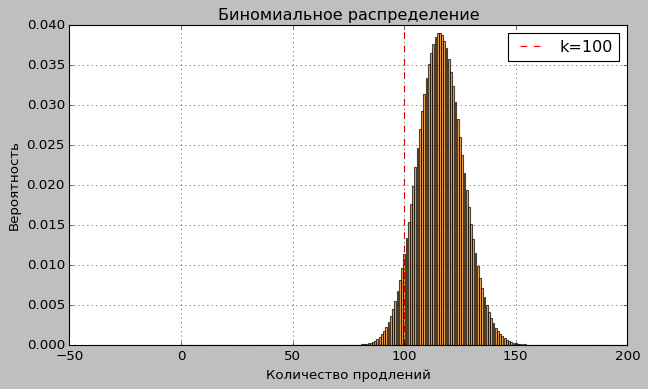

In [89]:
# зададим параметры биномиального распределения
x = np.arange(0, 200)
n = 1161
probabilities = binom.pmf(x, n, p)

# отобразим график распределения
plt.figure(figsize=(9, 5))
plt.bar(x, probabilities, color='DarkOrange', alpha=0.7)
plt.axvline(x=k, color='red', linestyle='--', label=f'k={k}')
plt.title('Биномиальное распределение')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

Для проведения акции с целью продления подписки у минимум 100 действующих клиентов при условии вероятности невыполнения плана не более 5 %, нужно разослать 1161 промокод.

***7.2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.***  

Для задачи также будем использовать биномиальное распределение, так как у события - рассылки уведомлений - может быть два исхода: клиенты могут открыть его и не открывать.

In [90]:
from math import sqrt
from scipy import stats as st
from scipy.stats import norm

In [91]:
# зададим параметры биномиального распределения
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

# зададим нормальное распределение
distr = st.norm(mu, sigma)

# найдем вероятность того, что уведомление откроют не более 399,5 пользователей
x = 399500
result = distr.cdf(x)

print("Вероятность того, что push-уведомление откроют 399,5 тыс. пользователей:", round(result, 2))


Вероятность того, что push-уведомление откроют 399,5 тыс. пользователей: 0.15


Построим график распределения.

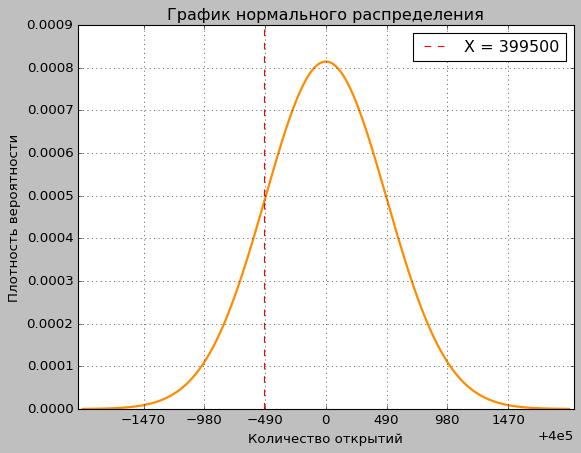

In [92]:
# границы промежутка, на котором будем строить график: mu плюс-минус 4 sigma
left = mu - 4 * sigma
right = mu + 4 * sigma

# рисуем график нормального распределения: получим список из 1000 чисел от left до right
x_values = np.linspace(left, right, 1000) 

plt.plot(x_values, norm.pdf(x_values, mu, sigma), lw=2, color='#FF8C00')
plt.axvline(x=x, color='red', linestyle='--', label=f"X = {x}")

# зададим подписи по оси x в прелеоах +- 3 ст. отклонений от мат. ожидания
x_ticks = np.arange(mu - 3 * sigma, mu + 3 * sigma + 1, sigma)
plt.xticks(x_ticks)

# отобразим график распределения
plt.title("График нормального распределения")
plt.xlabel("Количество открытий")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()

При рассылке 1 млн. push-уведомлений вероятность того, что push-уведомление откроют 399,5 тыс. пользователей составляет 15 %.

## Общие выводы

В первую очередь мы изучили имеющиеся у нас данные, выяснили, что данные у нас представлены за 2021 год, привели столбец с датой к корректному типу данных, а также добавили отдельный столбец с месяцем поездки, избавились от явных дубликатов и наконец посмотрели, есть ли у нас пропущенные значения, пропусков не оказалось.

Следующим шагом мы посмотрели распределение пользователей по городам, больше всего (а именно 14,3 %) - пользователей из города Пятигорска, удивительно, но меньше всего (а именно 11 %) - это пользователи из города Москвы. Возможно это связано с тем, что в связи с тем, что если город сильно крупный, не так просто доехать до нужного места на самокате, в Москве скорее всего более популярен другой транспорт, например, метро.

Кстати, примерно в 2021 году в таком городе, как Санкт-Петербург, например, как раз самокаты начинали приобретать большую популярность (в том году я была там в отпуске и была удивлена настолько большим количеством расставленных на улицах самокатов), однако в нашей выборке Питер не представлен, и проверить мою гипотезу мы в данном проекте не сможем :)

Пользователей без подписки больше, чем пользователей с подпиской, однако разница не сильно большая (54 % против 46 %). Самому младшему пользователю приложения 12 лет (что является нарушением существующих норм, так как возраст, с которого разрешено брать в прокат самокаты составляет 18 лет), самому старшему - 43 года (большинство пользователей находятся в возрасте от 20 до 30 лет), средний возвраст пользователей приложения - 25 лет.

Что касается расстояния поездок, минимальное расстояние, которое преодолел пользователь на самокате - 0,86 м, максимальное - 7,21 км (чаще всего проезжали расстояние от 2,5 до 4 км), среднее расстояние составляет около 3 км. Минимальная продолжительность поездки - 0,5 минут, на это нужно обязательно обратить внимание, так как минимальной продолжительности поездки не соответствует минимальная дистанция поездки - возможно есть неисправность счетчика времени на некоторых самокатах), максимальная продолжительность поездки - 41 минута (чаще всего пользователи проводили в поездках от 13 до 22 минут), среднее время поездки - 17 минут.

Мы посмотрели разницу между расстоянием и временем поездок у пользователей без подписок и у пользователей с платными подписками - у первой группы расстояние и время поездок несколько выше, чем у группы с подписками, у платной группы наблюдается явный пик поездок на расстояние примерно в 3 км, также у первой группы без подписок большее количество продолжительных по времени поездок (примерно от 10 до 25 минут), чем у платной группы.

## Выводы по годовой выручке

Мы создали отдельный датафрейм с агрегированными данными о поездках на основе общего нашего датафрейма и добавили отдельный столбец с помесячной выручкой, которую принес каждый пользователь. Посмотрели общую годовую выручку от обеих групп пользователей (3 878 641 рублей), доля годовой выручки от пользователей без подписки получилась выше, чем у пользователей с платной подпиской (57 % против 43 % или 2 234 104 рублей против 1 644 537 рублей). 

Интересный факт, учитывая, что ранее мы посмотрели, что количество бесплатных пользователей не сильно превышает количество платных пользователей, можно порекомендовать "не забывать" и про пользователей без подписок (может организовать какие-либо промо-акции или скидки от партнеров, чтобы увеличить и количество обычных пользователей в том числе).

## Проверка гипотез

1. Среднее время поездки пользователей с платной подпиской немного выше (18,5 минут), чем у пользователей без подписки (17,4 минуты), получилось, что хоть и без подписок пользователи ездят дольше чаще, тем не менее среднее время поездки у них ниже.

2. Среднее расстояние пользователей с платной подпиской не превышает 3130 метров (так как это оптимальное расстояние с точки зрения износа самоката), тут гипотеза подтвердилась, среднее расстояние действительно не превышает этот показатель, мы подсчитали, оно получилось равным 3115.4 м.

3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем у пользователей без подписки, это оказалось верным предположением (средняя выручка пользователя с платной подпиской: 361.5 рублей, средняя выручка пользователя без платной подписки: 325.8 рублей). Да, все логично, и пользователи с платной подпиской выгоднее для компании, однако засчет того, что пользователи без подписки также очень активно пользуются самокатами, и в разрезе года принесли даже немного больше, однозначно утверждать нельзя.

## Расчеты для промоакций

1. Идея с промоакцией: в целях сохранения не менее 100 действующих клиентов с платной подпиской и при условии вероятности невыполнения плана не более 5 % можно провести акцию с раздачей промокодов на бесплатный месяц подписки в количество 1161 штуки.

2. Идея с рассылкой: при рассылке 1 млн. push-уведомлений клиентам вероятность того, что push-уведомление откроют 399,5 тыс. пользователей составляет 15 %.

## Рекомендации

1. Детальнее обратить внимание на очень короткие по продолжительности поездки, ведь они не являются самыми короткими по дистанциям - проверить наличие технических неисправностей счетчика времени на самокатах, ведь это достаточно ощутимо отражается на выручке.

2. Устраивать промоакции и рассылки как для пользователей с платными подписками, так и для пользователей без подписок, возможно организовать бонусы, акции и скидки от партнеров.